In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\Genius\Desktop\kvv\17 Sept\Assignment\anvi.csv')
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [3]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
#Percentage of B cases
(357/(357+212))*100

62.741652021089635

In [5]:
print(data.shape)
print(data.dtypes)
pd.DataFrame(data.describe())

(569, 32)
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
import pandas as pd

# Assuming you have loaded your dataset into the 'data' variable

# Drop specified columns ('id' and 'diagnosis')
data1 = data.drop(['id', 'diagnosis'], axis=1)

# Calculate the first quartile (25th percentile)
q1 = data1.quantile(0.25)

# Calculate the third quartile (75th percentile)
q3 = data1.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = q3 - q1

print(IQR)


radius_mean                  4.080000
texture_mean                 5.630000
perimeter_mean              28.930000
area_mean                  362.400000
smoothness_mean              0.018930
compactness_mean             0.065480
concavity_mean               0.101140
concave points_mean          0.053690
symmetry_mean                0.033800
fractal_dimension_mean       0.008420
radius_se                    0.246500
texture_se                   0.640100
perimeter_se                 1.751000
area_se                     27.340000
smoothness_se                0.002977
compactness_se               0.019370
concavity_se                 0.026960
concave points_se            0.007072
symmetry_se                  0.008320
fractal_dimension_se         0.002310
radius_worst                 5.780000
texture_worst                8.640000
perimeter_worst             41.290000
area_worst                 568.700000
smoothness_worst             0.029400
compactness_worst            0.191900
concavity_wo

In [7]:
ul = (q3 + (1.5 * IQR))
ul

radius_mean                  21.900000
texture_mean                 30.245000
perimeter_mean              147.495000
area_mean                  1326.300000
smoothness_mean               0.133695
compactness_mean              0.228620
concavity_mean                0.282410
concave points_mean           0.154535
symmetry_mean                 0.246400
fractal_dimension_mean        0.078750
radius_se                     0.848650
texture_se                    2.434150
perimeter_se                  5.983500
area_se                      86.200000
smoothness_se                 0.012612
compactness_se                0.061505
concavity_se                  0.082490
concave points_se             0.025318
symmetry_se                   0.035960
fractal_dimension_se          0.008023
radius_worst                 27.460000
texture_worst                42.680000
perimeter_worst             187.335000
area_worst                 1937.050000
smoothness_worst              0.190100
compactness_worst        

In [8]:
cols = data1.columns

for i in cols:
    mask = data[i]>ul[i]
    data.loc[mask, i] = ul[i]

In [9]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,...,25.380,17.33,184.60,1937.05,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1937.05,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,...,14.910,26.50,98.87,567.70,0.19010,0.62695,0.6869,0.2575,0.41915,0.12301
4,84358402,M,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1326.3,0.111000,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,1937.05,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.097800,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.084550,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.117800,0.22862,0.28241,0.15200,...,25.740,39.42,184.60,1821.00,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301


In [10]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.062916,19.254736,91.543787,639.765202,0.096257,0.103222,0.086937,0.048552,0.180725,...,16.183882,25.648453,106.705369,849.907821,0.132207,0.249883,0.268754,0.114606,0.287616,0.083342
std,1.250206e+08,3.340025,4.187510,23.047218,305.343508,0.013713,0.049386,0.073900,0.037633,0.026092,...,4.587249,6.054406,31.957777,475.645240,0.022326,0.142851,0.197461,0.065732,0.053868,0.015993
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,21.900000,30.245000,147.495000,1326.300000,0.133695,0.228620,0.282410,0.154535,0.246400,...,27.460000,42.680000,187.335000,1937.050000,0.190100,0.626950,0.785500,0.291000,0.419150,0.123010


In [11]:
import pandas as pd

# Assuming you have loaded your dataset into the 'data' variable

# Check the column names
print(data.columns)

# Attempt to drop the 'Unnamed: 32' column
if 'Unnamed: 32' in data.columns:
    data = data.drop(['Unnamed: 32'], axis=1)
else:
    print("Column 'Unnamed: 32' not found in the dataset.")

# Now you can proceed with the rest of your code
# Calculate the first quartile (25th percentile)
q1 = data.quantile(0.25)

# Calculate the third quartile (75th percentile)
q3 = data.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = q3 - q1

print(IQR)


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Column 'Unnamed: 32' not found in the dataset.
id                         7.943911e+06
radius_mean                4.080000e+00
texture_mean               5.630000e+00
perimeter_mean             2.893000e+01
area_mean                  3.624000e+02
smoothness_mean            1.893000e-02
compactness_mean           6.548000e-02
concavity_mean         

In [12]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
print(data.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [14]:
dep = 'diagnosis'
X = data.drop(dep, axis=1)
Y = data[dep]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 5, stratify = Y)

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train1 = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
clf = classifier.fit(X_train1, Y_train)

In [18]:
coef = clf.coef_
coef

array([[ 0.03264136,  1.08958523,  1.51079188,  1.06432329,  1.28192139,
         0.42785689,  0.28735142,  1.18535373,  1.36788687,  0.18585197,
        -0.46194767,  1.18584116, -0.36559351,  0.99708859,  1.72545648,
        -0.13140126, -0.77987034, -0.07894251,  0.32490358, -0.87384039,
        -0.93832192,  1.44633402,  1.62853182,  1.38336286,  1.63658015,
         1.47240837,  0.84655465,  1.37888824,  1.67337524,  1.18745389,
         0.68444583]])

Feature: 0, Score: 0.03264
Feature: 1, Score: 1.08959
Feature: 2, Score: 1.51079
Feature: 3, Score: 1.06432
Feature: 4, Score: 1.28192
Feature: 5, Score: 0.42786
Feature: 6, Score: 0.28735
Feature: 7, Score: 1.18535
Feature: 8, Score: 1.36789
Feature: 9, Score: 0.18585
Feature: 10, Score: -0.46195
Feature: 11, Score: 1.18584
Feature: 12, Score: -0.36559
Feature: 13, Score: 0.99709
Feature: 14, Score: 1.72546
Feature: 15, Score: -0.1314
Feature: 16, Score: -0.77987
Feature: 17, Score: -0.07894
Feature: 18, Score: 0.3249
Feature: 19, Score: -0.87384
Feature: 20, Score: -0.93832
Feature: 21, Score: 1.44633
Feature: 22, Score: 1.62853
Feature: 23, Score: 1.38336
Feature: 24, Score: 1.63658
Feature: 25, Score: 1.47241
Feature: 26, Score: 0.84655
Feature: 27, Score: 1.37889
Feature: 28, Score: 1.67338
Feature: 29, Score: 1.18745
Feature: 30, Score: 0.68445


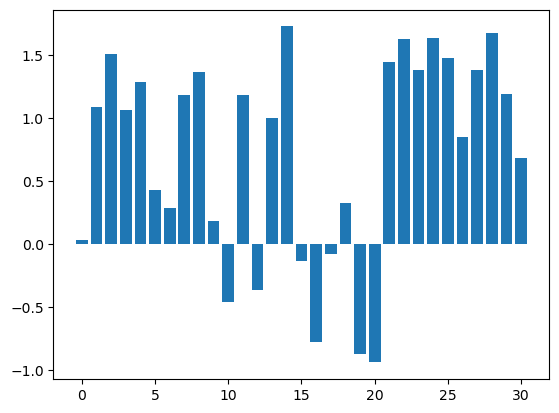

In [19]:
importance = clf.coef_[0]
for i, v in enumerate(importance):
    print(f'Feature: {i}, Score: {round(v, 5)}')

plt.bar([x for x in range(len(importance))], importance)
plt.show()

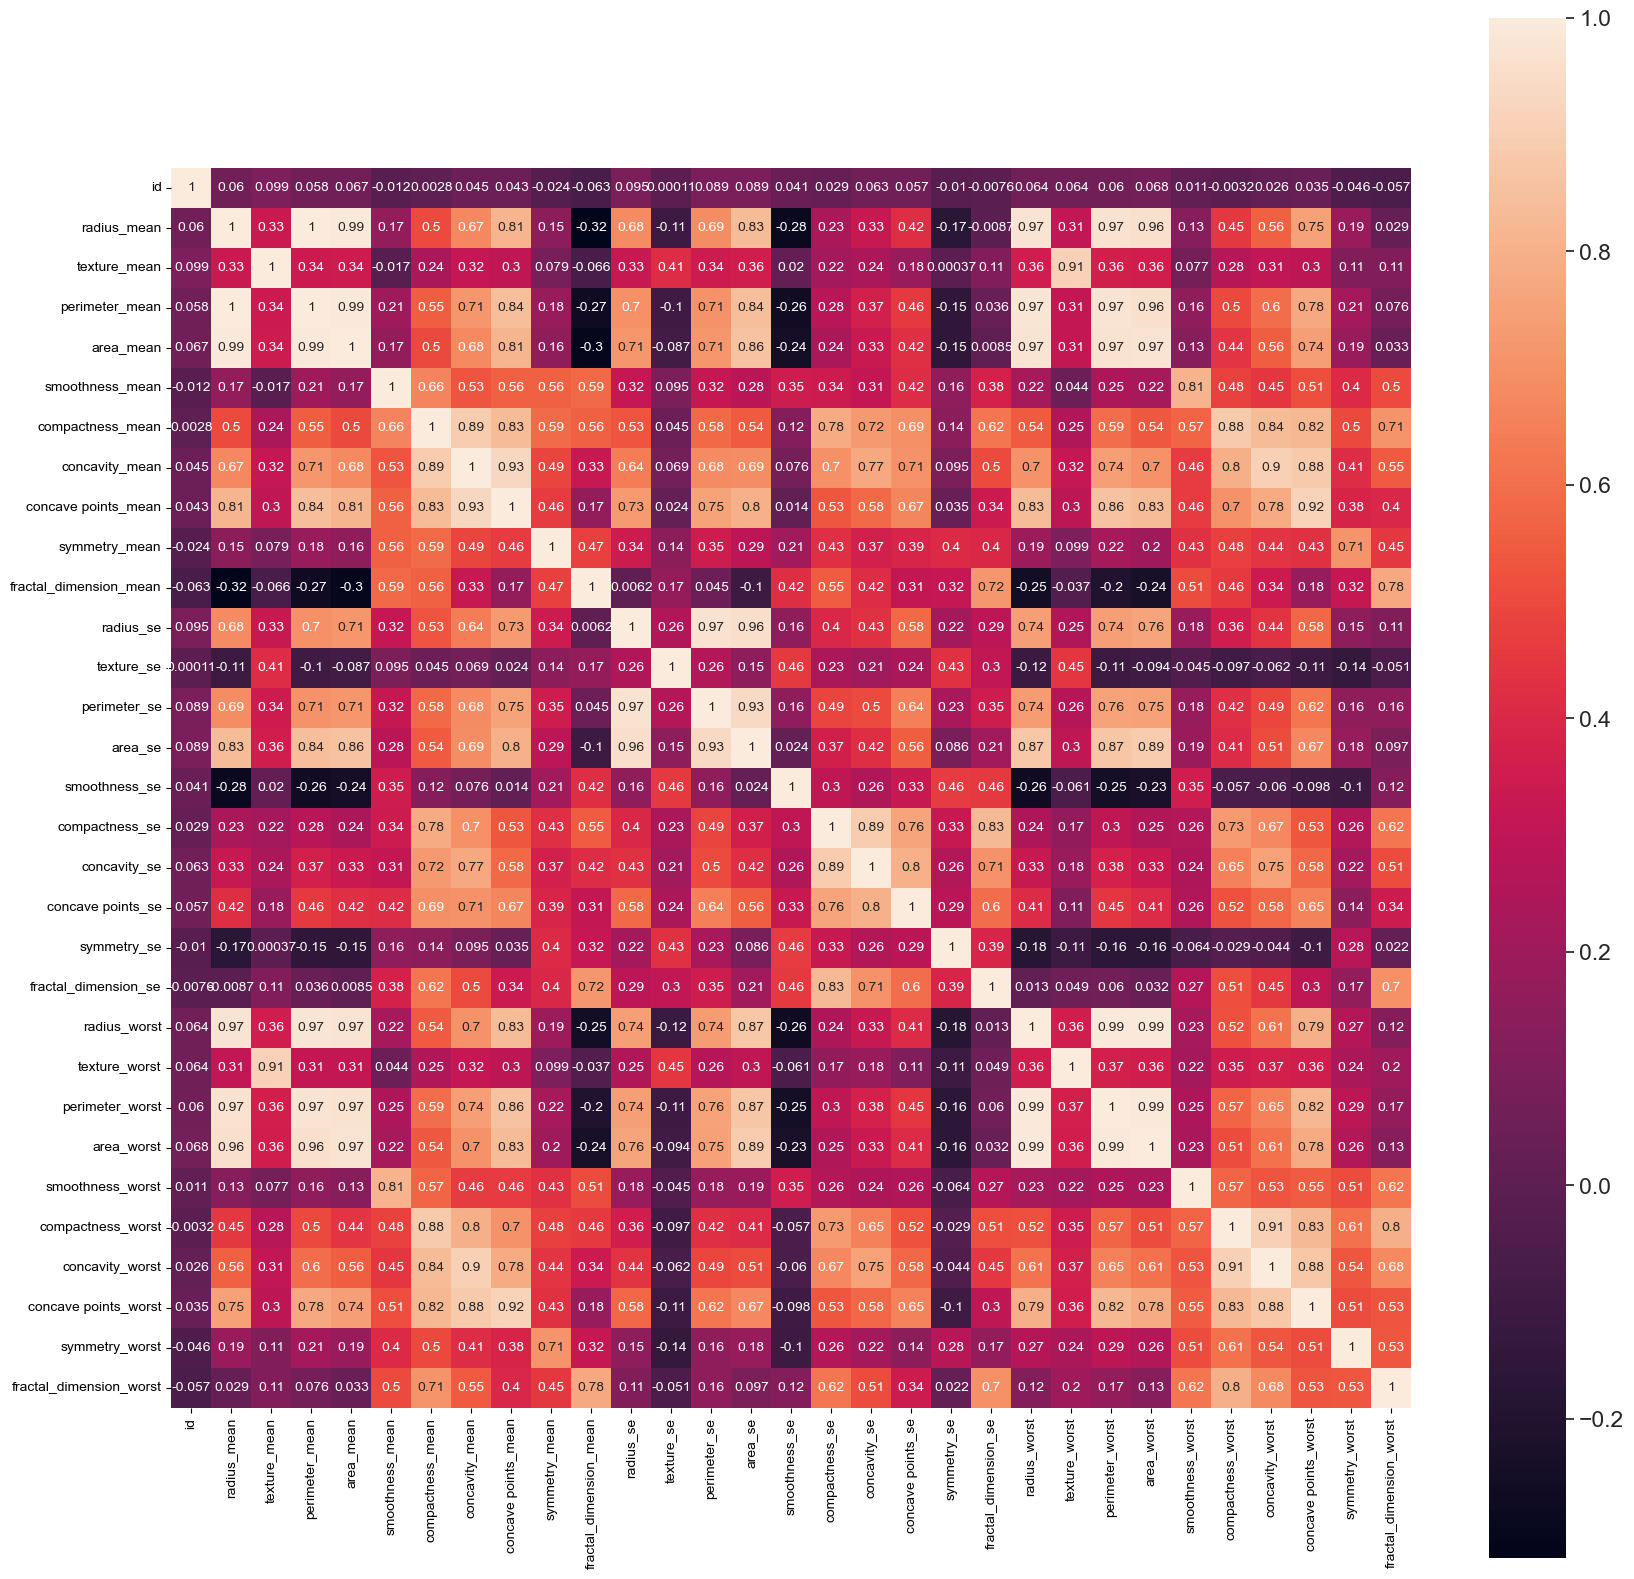

In [20]:
fig = plt.subplots(figsize = (20, 20))
sns.set(font_scale = 1.5)
sns.heatmap(data.corr(),square=True,cbar=True,annot=True,annot_kws={"size":10})
plt.show()

In [21]:
Y_pred = clf.predict(X_test)

In [22]:
Y_test = pd.DataFrame(Y_test, columns = [dep])
Y_test.head(2)

,diagnosis
330,M
86,M


In [23]:
Y_test[dep].value_counts()

B    72
M    42
Name: diagnosis, dtype: int64

In [24]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[72,  0],
       [ 7, 35]], dtype=int64)

Text(0.5, 14.049999999999999, 'Predicted label')

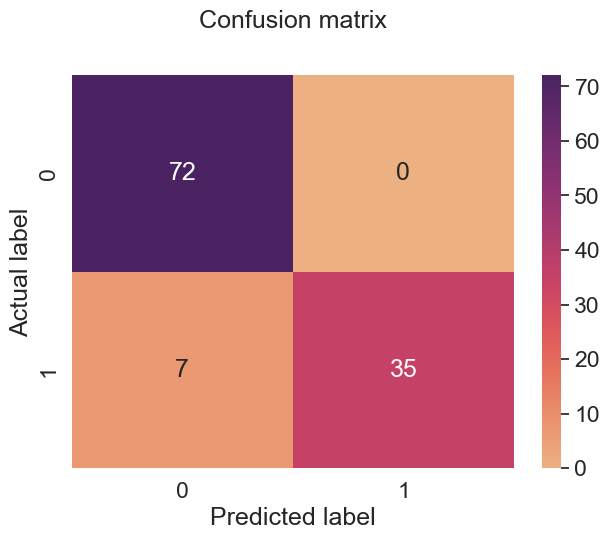

In [25]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))

plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "flare", fmt = 'g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
total1 = sum(sum(cnf_matrix))
accuracy1 = (cnf_matrix[0,0]+cnf_matrix[1,1])/total1
print('Accuracy :', accuracy1)

sensitivity1 = cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[0,1])
print('Specificity : ', specificity1)

Accuracy : 0.9385964912280702
Sensitivity :  0.8333333333333334
Specificity :  1.0


In [27]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, target_names=["Yes","No"]))

              precision    recall  f1-score   support

         Yes       0.91      1.00      0.95        72
          No       1.00      0.83      0.91        42

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



# SVM

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [29]:
svc=SVC()
svc.fit(X_train, Y_train)

SVC()

In [30]:
Y_pred = svc.predict(X_test)

Y_pred

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], dtype=object)

In [31]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score: 0.6316


In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)

print('Confusion matrix\n', cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[72  0]
 [42  0]]
True Positives(TP) =  72
True Negatives(TN) =  0
False Positives(FP) =  0
False Negatives(FN) =  42


In [33]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[72,  0],
       [42,  0]], dtype=int64)

In [34]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           B       0.63      1.00      0.77        72
           M       0.00      0.00      0.00        42

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



# Decision Tree

In [35]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.tree import DecisionTreeClassifier,export_graphviz # Import Decision Tree Classifier
from sklearn import tree

In [36]:
clf = DecisionTreeClassifier(criterion="gini")
tree1=clf.fit(X_train,Y_train)

In [37]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[72,  0],
       [42,  0]], dtype=int64)

In [38]:
confusion = sklearn.metrics.confusion_matrix(Y_test, Y_pred)

Accuracy = sklearn.metrics.accuracy_score(Y_test, Y_pred)*100
sensitivity = (confusion[1][1]/float(confusion[1:].sum()))*100
specificity = (confusion[0][0]/float(confusion[:,0].sum()))*100

print('Model Accuracy:',Accuracy)
print ("Sensitivity: {0:.3f}".format(sensitivity))
print ("Specificity: {0:.3f}".format(specificity))

Model Accuracy: 63.1578947368421
Sensitivity: 0.000
Specificity: 63.158


# KNN

In [39]:
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier()

In [41]:
result=knn.fit(X_train1,Y_train)
result

KNeighborsClassifier()

In [42]:
Y_pred = knn.predict(X_test)

In [43]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[71,  1],
       [ 6, 36]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

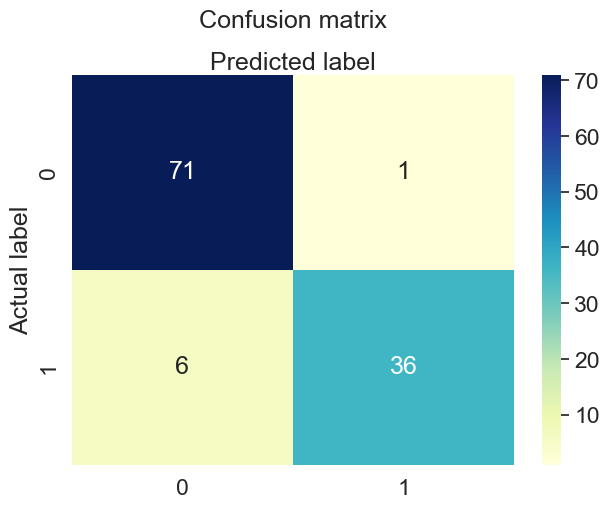

In [44]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [45]:
confusion = sklearn.metrics.confusion_matrix(Y_test, Y_pred)

Accuracy = sklearn.metrics.accuracy_score(Y_test, Y_pred)*100
sensitivity = (confusion[1][1]/float(confusion[1:].sum()))*100
specificity = (confusion[0][0]/float(confusion[:,0].sum()))*100

print('Model Accuracy:',Accuracy)
print ("Sensitivity: {0:.3f}".format(sensitivity))
print ("Specificity: {0:.3f}".format(specificity))

Model Accuracy: 93.85964912280701
Sensitivity: 85.714
Specificity: 92.208
